# Using coherent measures of risk in portfolio optimization

Based on the paper:

**Risk-adjusted probability measures in portfolio optimization with coherent measures of risk.** 

N. Miller and A. Ruszczyński.

**Mean-risk portfolio model**

$R$ portfolio return. Performance: risk($R$), mean($R$)

Efficient portfolio: 
- given mean($R$), min risk($R$)
- given risk($R$), max mean($R$)

**Portfolio optimization model**
        
   - $n\times N$ matrix of returns $R=(r_{ij})$, where $n$ assets, $N$ trading days
   - coherent measure of risk $\rho:\mathbb{R}^N\to\mathbb{R}$
   - $\Delta^n =\{z\in\mathbb{R}_{\geq 0}^n\;:
       \;\sum_{i=1}^{n}z_i = 1\}$

**Portfolio optimization model**

$$
    \min_{z\in\Delta^n}\;\rho(R^\intercal z) 
$$

In [3]:
#import Pkg; 

# Preparing the data

## Making a data frame that contains all tickers/constituents in the s&p500 

In [4]:
#Pkg.add("CSV")
#Pkg.add("DataFrames")
using CSV
using DataFrames

Tickers = DataFrame(
        CSV.File("SP500tickers.csv"));

In [5]:
Tickers

Row,# Symbol
,String7
1,MMM
2,AOS
3,ABT
4,ABBV
5,ACN
6,ADM
7,ADBE
8,ADP
9,AES


## Selecting some tickers randomly from all the s&p500 tickers

In [6]:
#Pkg.add("StatsBase");
using StatsBase
 
n_init = 100; 

sTickers = sample(axes(Tickers, 1), n_init; 
        replace = false, ordered = true);

Assets = Tickers[sTickers,1];

In [7]:
Assets

100-element Vector{String7}:
 "ACN"
 "ADBE"
 "ABNB"
 "ALLE"
 "GOOG"
 "AMZN"
 "AAL"
 "AIG"
 "AME"
 "APA"
 "AXON"
 "BKR"
 "BAC"
 ⋮
 "TSCO"
 "UNH"
 "VLTO"
 "VRSN"
 "VZ"
 "WAB"
 "WBA"
 "WEC"
 "WELL"
 "WY"
 "ZION"
 "ZTS"

## Getting daily stock prices from Yahoo! Finance

In [8]:
#Pkg.add("YFinance");
using YFinance

data = get_prices.(Assets,
        startdt="2013-11-21",
        enddt="2023-11-21",
        throw_error=true);

In [9]:
data = data |> DataFrame
data[!,["ticker","open","close","adjclose"]]

Row,ticker,open,close,adjclose
,String7,Array…,Array…,Array…
1,ACN,"[65.8014, 65.9106, 65.348, 64.9785, 65.0037, 65.2892, 65.0121, 64.0968, 63.3998, 63.9373 … 313.0, 316.87, 317.28, 315.54, 316.01, 319.82, 319.62, 327.1, 327.66, 326.46]","[78.43, 77.84, 77.21, 77.37, 77.61, 77.47, 76.33, 77.09, 76.07, 75.79 … 315.19, 317.82, 314.22, 319.69, 315.63, 320.49, 325.5, 327.32, 327.83, 330.9]","[65.8602, 65.3648, 64.8357, 64.9701, 65.1716, 65.0541, 64.0968, 64.735, 63.8784, 63.6433 … 315.19, 317.82, 314.22, 319.69, 315.63, 320.49, 325.5, 327.32, 327.83, 330.9]"
2,ADBE,"[56.28, 56.26, 56.62, 56.87, 56.85, 57.12, 56.74, 56.63, 56.19, 55.63 … 568.81, 589.0, 587.51, 580.49, 589.98, 601.56, 605.0, 595.45, 602.07, 605.31]","[56.23, 56.41, 56.95, 56.7, 56.91, 56.78, 56.76, 56.4, 56.05, 55.04 … 585.2, 585.31, 577.74, 597.22, 590.34, 604.33, 595.31, 602.06, 602.66, 612.7]","[56.23, 56.41, 56.95, 56.7, 56.91, 56.78, 56.76, 56.4, 56.05, 55.04 … 585.2, 585.31, 577.74, 597.22, 590.34, 604.33, 595.31, 602.06, 602.66, 612.7]"
3,ABNB,"[146.0, 146.55, 135.0, 126.69, 125.83, 143.0, 150.45, 155.31, 170.0, 162.814 … 118.25, 119.43, 118.35, 114.525, 117.51, 122.355, 128.0, 127.12, 126.65, 127.4]","[144.71, 139.25, 130.0, 124.8, 137.99, 147.05, 157.3, 163.02, 163.19, 158.01 … 121.08, 117.66, 115.52, 118.15, 119.15, 126.68, 128.35, 126.28, 127.15, 129.7]","[144.71, 139.25, 130.0, 124.8, 137.99, 147.05, 157.3, 163.02, 163.19, 158.01 … 121.08, 117.66, 115.52, 118.15, 119.15, 126.68, 128.35, 126.28, 127.15, 129.7]"
4,ALLE,"[40.4423, 39.897, 40.2423, 40.8967, 39.5789, 38.8518, 39.1518, 38.8973, 38.561, 38.4247 … 101.16, 101.89, 102.44, 102.05, 102.75, 105.29, 106.38, 106.61, 106.96, 106.27]","[43.79, 43.99, 44.18, 43.2, 43.24, 43.24, 43.14, 42.9, 41.83, 41.05 … 101.41, 102.07, 101.13, 103.49, 103.23, 105.93, 106.67, 105.95, 106.35, 105.74]","[39.797, 39.9788, 40.1515, 39.2608, 39.2972, 39.2972, 39.2063, 38.9882, 38.0157, 37.3069 … 101.41, 102.07, 101.13, 103.49, 103.23, 105.93, 106.67, 105.95, 106.35, 105.74]"
5,GOOG,"[25.5791, 25.739, 25.8322, 26.1171, 26.4516, 26.4548, 26.4885, 26.1756, 26.1861, 26.3313 … 131.98, 132.36, 133.36, 131.53, 133.36, 135.65, 136.64, 136.96, 137.82, 135.5]","[25.7552, 25.7009, 26.0506, 26.3614, 26.4785, 26.3908, 26.2636, 26.2332, 26.3557, 26.3348 … 132.4, 133.26, 131.69, 134.06, 133.64, 135.43, 136.38, 138.7, 136.94, 137.92]","[25.7552, 25.7009, 26.0506, 26.3614, 26.4785, 26.3908, 26.2636, 26.2332, 26.3557, 26.3348 … 132.4, 133.26, 131.69, 134.06, 133.64, 135.43, 136.38, 138.7, 136.94, 137.92]"
6,AMZN,"[18.2025, 18.5, 18.691, 18.8805, 19.175, 19.455, 19.95, 19.5055, 19.175, 19.3325 … 140.55, 142.97, 142.02, 140.46, 142.08, 145.0, 147.06, 140.91, 142.66, 145.13]","[18.446, 18.6155, 18.832, 19.0685, 19.3355, 19.681, 19.615, 19.233, 19.298, 19.2245 … 142.71, 142.08, 140.6, 143.56, 142.59, 145.8, 143.2, 142.83, 145.18, 146.13]","[18.446, 18.6155, 18.832, 19.0685, 19.3355, 19.681, 19.615, 19.233, 19.298, 19.2245 … 142.71, 142.08, 140.6, 143.56, 142.59, 145.8, 143.2, 142.83, 145.18, 146.13]"
7,AAL,"[22.6918, 22.8143, 23.05, 22.7861, 22.5504, 22.7389, 22.2016, 21.6736, 21.0986, 20.9949 … 11.72, 11.86, 12.16, 11.67, 11.7, 12.15, 12.35, 12.42, 12.27, 12.23]","[23.99, 24.27, 24.24, 23.81, 23.98, 23.48, 23.04, 22.39, 21.87, 22.35 … 11.75, 12.01, 11.75, 11.8, 11.78, 12.25, 12.42, 12.19, 12.29, 12.4]","[22.6164, 22.8803, 22.8521, 22.4467, 22.6069, 22.1356, 21.7208, 21.108, 20.6178, 21.0703 … 11.75, 12.01, 11.75, 11.8, 11.78, 12.25, 12.42, 12.19, 12.29, 12.4]"
8,AIG,"[38.6021, 39.0003, 39.4941, 39.8365, 39.3348, 39.6135, 39.6374, 39.446, 38.6639, 38.8634 … 63.85, 63.1, 62.91, 63.08, 63.49, 64.06, 64.2, 63.57, 64.38, 63.99]","[48.92, 49.59, 49.8, 49.39, 49.65, 49.75, 49.71, 48.65, 48.94, 48.19 … 63.1, 62.58, 62.85, 63.82, 63.73, 64.21, 63.48, 64.12, 64.48, 64.36]","[38.9605, 39.494, 39.6613, 39.3348, 39.5418, 39.6215, 39.5896, 38.8235, 39.055, 38.4564 … 63.1, 62.58, 62.85, 63.82, 63.73, 64.21, 63.48, 64.12, 64.48, 64.36]"
9,AME,"[45.5145, 46.3002

## Checking that the necessary data is complete
Some assets may have missing values in adjusted closing price 

In [10]:
# adding a column length(adjusted closing price) 
data[!,:"length_adjclose"] = [
    length(data[!,"adjclose"][i]) for i in 1:n_init];

# showing number of assets with incomplete data
N_aux = maximum(data[!,:"length_adjclose"]);
count(data[!,"length_adjclose"] .< N_aux)

5

## Setting the data

In [11]:
# selecting assets with full historical data
data = filter(:"length_adjclose" 
        => l -> l == N_aux, data); 

# number of assets in our portfolio
n = size(data,1);

# number of trading days
N = N_aux - 1; 

In [12]:
data[!,["ticker","timestamp","adjclose"]]

Row,ticker,timestamp,adjclose
,String7,Array…,Array…
1,ACN,"[DateTime(""2013-11-21T14:30:00""), DateTime(""2013-11-22T14:30:00""), DateTime(""2013-11-25T14:30:00""), DateTime(""2013-11-26T14:30:00""), DateTime(""2013-11-27T14:30:00""), DateTime(""2013-11-29T14:30:00""), DateTime(""2013-12-02T14:30:00""), DateTime(""2013-12-03T14:30:00""), DateTime(""2013-12-04T14:30:00""), DateTime(""2013-12-05T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[65.8602, 65.3648, 64.8357, 64.9701, 65.1716, 65.0541, 64.0968, 64.735, 63.8784, 63.6433 … 315.19, 317.82, 314.22, 319.69, 315.63, 320.49, 325.5, 327.32, 327.83, 330.9]"
2,ADBE,"[DateTime(""2013-11-21T14:30:00""), DateTime(""2013-11-22T14:30:00""), DateTime(""2013-11-25T14:30:00""), DateTime(""2013-11-26T14:30:00""), DateTime(""2013-11-27T14:30:00""), DateTime(""2013-11-29T14:30:00""), DateTime(""2013-12-02T14:30:00""), DateTime(""2013-12-03T14:30:00""), DateTime(""2013-12-04T14:30:00""), DateTime(""2013-12-05T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[56.23, 56.41, 56.95, 56.7, 56.91, 56.78, 56.76, 56.4, 56.05, 55.04 … 585.2, 585.31, 577.74, 597.22, 590.34, 604.33, 595.31, 602.06, 602.66, 612.7]"
3,ALLE,"[DateTime(""2013-11-21T14:30:00""), DateTime(""2013-11-22T14:30:00""), DateTime(""2013-11-25T14:30:00""), DateTime(""2013-11-26T14:30:00""), DateTime(""2013-11-27T14:30:00""), DateTime(""2013-11-29T14:30:00""), DateTime(""2013-12-02T14:30:00""), DateTime(""2013-12-03T14:30:00""), DateTime(""2013-12-04T14:30:00""), DateTime(""2013-12-05T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[39.797, 39.9788, 40.1515, 39.2608, 39.2972, 39.2972, 39.2063, 38.9882, 38.0157, 37.3069 … 101.41, 102.07, 101.13, 103.49, 103.23, 105.93, 106.67, 105.95, 106.35, 105.74]"
4,GOOG,"[DateTime(""2013-11-21T14:30:00""), DateTime(""2013-11-22T14:30:00""), DateTime(""2013-11-25T14:30:00""), DateTime(""2013-11-26T14:30:00""), DateTime(""2013-11-27T14:30:00""), DateTime(""2013-11-29T14:30:00""), DateTime(""2013-12-02T14:30:00""), DateTime(""2013-12-03T14:30:00""), DateTime(""2013-12-04T14:30:00""), DateTime(""2013-12-05T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[25.7552, 25.7009, 26.0506, 26.3614, 26.4785, 26.3908, 26.2636, 26.2332, 26.3557, 26.3348 … 132.4, 133.26, 131.69, 134.06, 133.64, 135.43, 136.38, 138.7, 136.94, 137.92]"
5,AMZN,"[DateTime(""2013-11-21T14:30:00""), DateTime(""2013-11-22T14:30:00""), DateTime(""2013-11-25T14:30:00""), DateTime(""2013-11-26T14:30:00""), DateTime(""2013-11-27T14:30:00""), DateTime(""2013-11-29T14:30:00""), DateTime(""2013-12-02T14:30:00""), DateTime(""2013-12-03T14:30:00""), DateTime(""2013-12-04T14:30:00""), DateTime(""2013-12-05T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime

## Calculating daily returns
$
 \text{daily return} = \log\Big(\frac{\text{today's adjusted closing price}}
             {\text{yesterday's adjusted closing price}}\Big)
$

In [13]:
#Pkg.add("ShiftedArrays")
using ShiftedArrays

r = [zeros(N) for _ in 1:n]; aux1 = data[!,"adjclose"][:];
for i in 1:n
    aux2 = ShiftedArray(aux1[i],1,default=NaN) 
    r_aux = log.(aux1[i]./aux2)
    r[i] = r_aux[2:N_aux]
end
R = transpose(reduce(hcat,r));

In [14]:
DataFrame(Matrix(R),:auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.00755077,-0.00812678,0.00207042,0.00309686,-0.00180527,-0.0148248,0.00990756,-0.0133199,-0.00368715,-0.00343661,-0.0053099,0.00371985,-0.0134837,-0.00431073,-0.00189131,0.00915473,-0.00834377,0.0216555,0.0501621,0.0129955,0.0123382,-0.00294735,0.0102784,0.00437193,-0.00546876,0.00194817,-0.0133461,0.00332239,-0.0106209,0.0120941,0.00769921,0.00969047,0.00300951,-0.0260575,0.0109191,0.0273234,-0.00118801,0.00367841,0.0059042,0.00551895,-0.017482,-0.0331954,-0.000369398,0.00184663,-0.0121268,0.00496725,-0.0104606,-0.0226636,-0.000127989,-0.00655303,0.0121724,0.0258974,-0.00759938,0.00722689,0.00816026,0.00650501,0.00451653,0.00582853,0.00807965,0.00144014,0.00502481,0.0017884,-0.00645303,-0.00012037,-0.000479882,-0.000119898,-0.01025,0.0177806,0.00154674,-0.00369254,0.00154984,0.00130984,-0.00584751,-0.00962142,-0.00800768,-0.00868672,0.0243993,0.0047846,-0.0139409,0.00519052,-0.00277259,-0.0100713,0.0183672,-0.00660725,-0.0515661,0.000126705,0.0114805,-0.00226037,0.00564176,-0.00803331,-0.0153661,0.00942534,-0.00750799,0.0143745,-0.0212491,0.00337873,0.00942447,0.0140364,0.00240451,-0.00265776,⋯
2,0.00319603,0.00952726,-0.00439948,0.00369685,-0.00228694,-0.000352307,-0.00636264,-0.00622505,-0.0181839,0.010123,-0.00288184,-0.00216683,-0.0123683,-0.0119673,0.12027,-0.0400422,-0.0142897,0.0234781,-0.0155333,0.0192526,0.00353749,0.00100836,0.000839611,-0.00117564,0.000671946,0.00552629,-0.0099019,-0.00219504,-0.0177358,0.014519,-0.00118774,0.00322059,0.00741866,-0.0157457,0.0297576,0.0214675,-0.000810952,-0.00422768,-0.0085093,0.015006,-0.0145131,-0.029843,-0.012431,0.0127694,-0.0110574,0.0157831,-0.00337327,-0.0187591,0.0276735,0.0212069,0.0055583,0.024796,0.0142115,0.0029746,0.0181245,0.0287507,0.0192057,0.00467165,-0.00980624,0.00718118,-0.00380399,0.00802976,-0.0111128,-0.00279765,0.0304946,-0.018622,-0.0112829,0.0108457,0.00436369,0.000290185,-0.00582076,-0.00702984,-0.00841271,0.00870656,-0.0145037,0.0016385,0.0144801,0.00512107,-0.013074,0.0126361,-0.0199077,-0.0287072,0.00869902,-0.0294524,0.00981083,0.00540915,0.0131682,0.00288604,-0.00684877,-0.0473786,-0.0182602,-0.0139587,0.0220795,0.0261828,-0.0315352,-0.0162312,0.0146036,0.0116601,0.0148624,0.0157384,⋯
3,0.00455656,0.00431027,-0.022432,0.000925826,0.0,-0.00231525,-0.00557884,-0.025258,-0.0188231,-0.00856293,0.0117247,0.0329623,-0.00235209,0.0119392,0.00649501,0.0101221,0.00137252,0.0118157,0.00405769,-0.00428404,0.00877328,-0.00156918,0.00268866,-0.00134361,-0.0117171,0.00158525,-0.0122948,0.0070767,-0.00638977,0.00434041,0.000227786,0.00568099,0.0356148,0.0282442,0.016027,-0.00629592,-0.00210721,0.0125784,0.00353533,0.00703365,-0.0164194,-0.0186129,-0.0051372,0.0239599,0.00104657,0.033748,-0.00141702,-0.0394722,0.0127765,-0.00940953,0.0338735,0.014116,-0.00200424,0.00100262,0.00220239

## Representation of coherent risk measure
$\rho:\mathbb{R}^N\to\mathbb{R}$ has the form
$$
    \rho(R^\intercal z) = \max_{q\in A}
    \Bigl\{-\sum_{j=1}^{N}q_j\sum_{i=1}^{n}r_{ij}z_i\Bigl\},
$$
where $A$ is a closed convex subset of $\Delta^N$.

To describe $A$ we assume $R$ follows certain probability distribution.


## Assumption : daily returns are equally likely scenarios
$p_j = \text{Prob}(R^\intercal z = \sum_{i=1}^{n}r_{ij}z_i)$ for each trading day $j=1,...,N$

In [15]:
p = (1/N)*ones(N);

## Portfolio optimization model as min-max problem
$$
    \min_{z\in\Delta^n}\max_{q\in A}
    \Bigl\{-\sum_{j=1}^{N}q_j\sum_{i=1}^{n}r_{ij}z_i\Bigl\}
$$

__Optimal solution $(z^*,q^*)$ to this zero-sum game exists due to von Neumann's minmax theorem.__

## Mean-semideviation model

Suppose $\lambda\in[0,1]$. Consider the risk measure 

$$
    \rho(R^\intercal z) = -\mathbb{E}(R^\intercal z) 
        + \lambda\sigma_1(R^\intercal z),
$$

where $\sigma_1(R^\intercal z)=\mathbb{E}
\max\{\mathbb{E}(R^\intercal z)-R^\intercal z, 0\}$

For the given probability distribution $p$, we have

$$
   \rho(R^\intercal z) = -\langle p,R^\intercal z \rangle 
   + \lambda\sum_{j=1}^{N}p_j\max\{\langle p,R^\intercal z \rangle 
   - \langle r_{\cdot j},z \rangle ,0\}
$$
and

$$ A = \{(1-\lambda\sum_{j=1}^{N}g_j)p
+ \lambda g : |g_j|\leq p_j,\;\forall\;j=1,...,N\}$$

## Mean-semideviation model

$$
\begin{align}
 &\min\; -\langle p,R^\intercal z \rangle + \lambda\sum_{j=1}^{N}p_j\max\{\langle p,R^\intercal z \rangle - \langle r_{\cdot j},z \rangle ,0\} \\
 &\text{ s.t.}\quad z\in\mathbb{R}^n, \quad z_i\geq 0\;\forall\; i=1,...,n, \quad \sum_{i=1}^{n}z_i = 1
\end{align}
$$

In [16]:
#Pkg.add("JuMP")
#Pkg.add("HiGHS")
using JuMP; using HiGHS;

m = Model(HiGHS.Optimizer); set_silent(m);
lambda = 0.6;

@variable(m, z[i=1:n] >= 0.0)     
@variable(m, s[j=1:N] >= 0.0) 
@expression(m,auz[k in 1:N],
    sum(p[j]*R[i,j]*z[i] for j in 1:N, i in 1:n) 
    - sum(R[i,k]*z[i] for i in 1:n))

@constraint(m, C[k in 1:N], s[k] >= auz[k])  
@constraint(m, sum(z) == 1) 
@objective(m, Min, -sum(z[i]*R[i,j]*p[j] for j in 1:N, i in 1:n) 
    + lambda*sum(p[j]*s[j] for j in 1:N)) 

optimize!(m);

## Optimal asset allocation

In [17]:
z_opt = value.(z); data[!,:"opt_alloc"] = z_opt;

data_to_show = filter(:"opt_alloc" => a -> a != 0.0, data);
data_to_show[!,[:"ticker",:"opt_alloc"]]

Row,ticker,opt_alloc
,String7,Float64
1,GOOG,0.00350448
2,AMZN,0.0109262
3,AXON,0.018604
4,WRB,0.0510288
5,BG,0.00502805
6,CHTR,0.0080658
7,CME,0.0739862
8,DHR,0.00928143
9,FANG,0.00270947


In [18]:
#Pkg.add("Plots")
using Plots
s=string(lambda)

ac = bar(data_to_show[:,"ticker"],
    data_to_show[:,"opt_alloc"].*100.00, 
    xrotation=60,xticks = :all,yticks = 0:5:100,
    title ="optimal asset allocation \n lambda = $s",
    label = false,
    xlabel = "S&P500 constituents",
    ylabel = "asset allocation (%)");

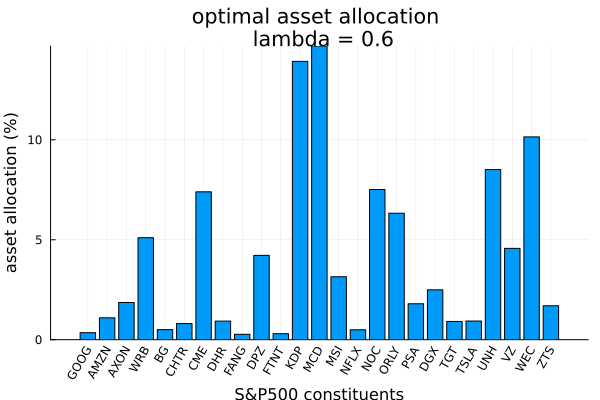

In [19]:
ac

## Risk-adjusted measure

In [20]:
# Lagrange multipliers associated to the constraint in the model
u_opt = dual.(C); 

# risk-adjusted probabilities
q = (1-sum(u_opt))*p + u_opt 

2515-element Vector{Float64}:
 0.00028462152021422395
 0.0005231901086834088
 0.0005231901086834088
 0.00028462152021422395
 0.0005231901086834088
 0.0005231901086834088
 0.00028462152021422395
 0.0005231901086834088
 0.0005231901086834088
 0.00028462152021422395
 0.0005231901086834088
 0.0005231901086834088
 0.0005231901086834088
 ⋮
 0.00028462152021422395
 0.00028462152021422395
 0.00028462152021422395
 0.0005231901086834088
 0.0005231901086834088
 0.00028462152021422395
 0.00028462152021422395
 0.00028462152021422395
 0.00044537283709971423
 0.00028462152021422395
 0.0005231901086834088
 0.00028462152021422395

In [21]:
opt_return = [sum(R[:,i].*z_opt) for i in 1:N];

In [22]:
#Pkg.add("Plots")
using Plots

sorted_adj = sortslices(hcat(opt_return,q), 
    dims = 1, by=col->(col[1], col[2]))

str = string(lambda)

plot_img = plot(
    sorted_adj[:,1], [(1:N)./N, cumsum(sorted_adj[:,2])], 
    title = "cdf portfolio returns \n lambda = $str", 
    linewidth=1, msw = 0, ms = 1.0,
    xlabel = "returns", yticks = 0:0.1:1.0,
    label = ["using original measure p" "using risk-adjusted measure q"]);

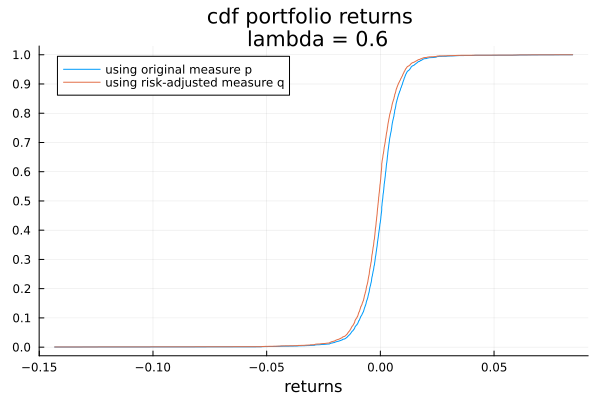

In [23]:
plot_img

In [24]:
fig_name = "cdf_returns-lambda=$str.pdf";
plot_lambda = plot(ac,plot_img,layout = (1,2));
savefig(plot_lambda,fig_name);

In [25]:
objective_value(m)

0.0011975662083947261